In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [50]:
# загрузка данных и структура данных
df=pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
# анализ данных
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [52]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [53]:
df = df.dropna()
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [54]:
# названия столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df['Class'].value_counts()[1]

492

In [56]:
print('Обычные транзакции составляют', round(df['Class'].value_counts()[0]/len(df)*100, 2))
print('Мошеннические транзакции составляют', round(df['Class'].value_counts()[1]/len(df)*100, 2))

Обычные транзакции составляют 99.83
Мошеннические транзакции составляют 0.17


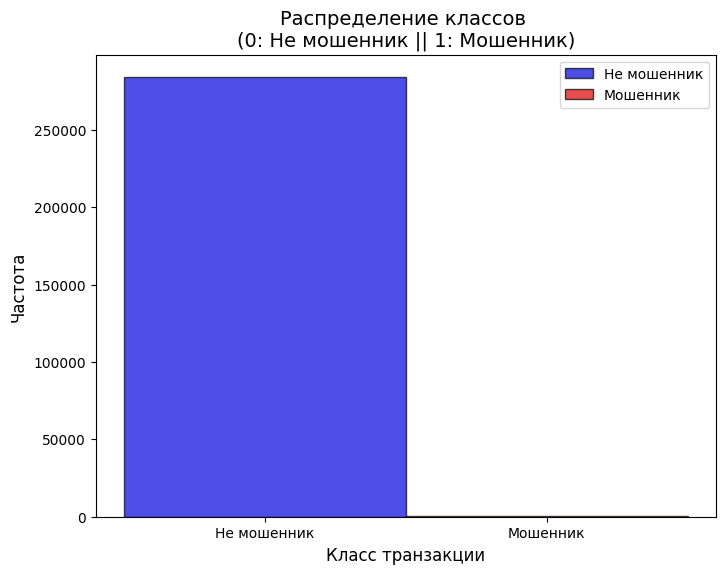

In [57]:
# Параметры цвета для классов
colors = ["#0101DF", "#DF0101"]  # Цвет для обычных и мошеннических транзакций

# Строим гистограмму для двух классов (0 и 1)
plt.figure(figsize=(8, 6))

# Строим для класса 0 (Не мошенник)
plt.hist(df[df['Class'] == 0]['Class'], bins=1, color=colors[0], edgecolor='black', alpha=0.7, label='Не мошенник')

# Строим для класса 1 (Мошенник)
plt.hist(df[df['Class'] == 1]['Class'], bins=1, color=colors[1], edgecolor='black', alpha=0.7, label='Мошенник')

# Настройка заголовка и подписей
plt.title('Распределение классов \n(0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.xlabel('Класс транзакции', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Подписи для оси X
plt.xticks([0, 1], ['Не мошенник', 'Мошенник'])

# Легенда
plt.legend()

# Отображаем график
plt.show()

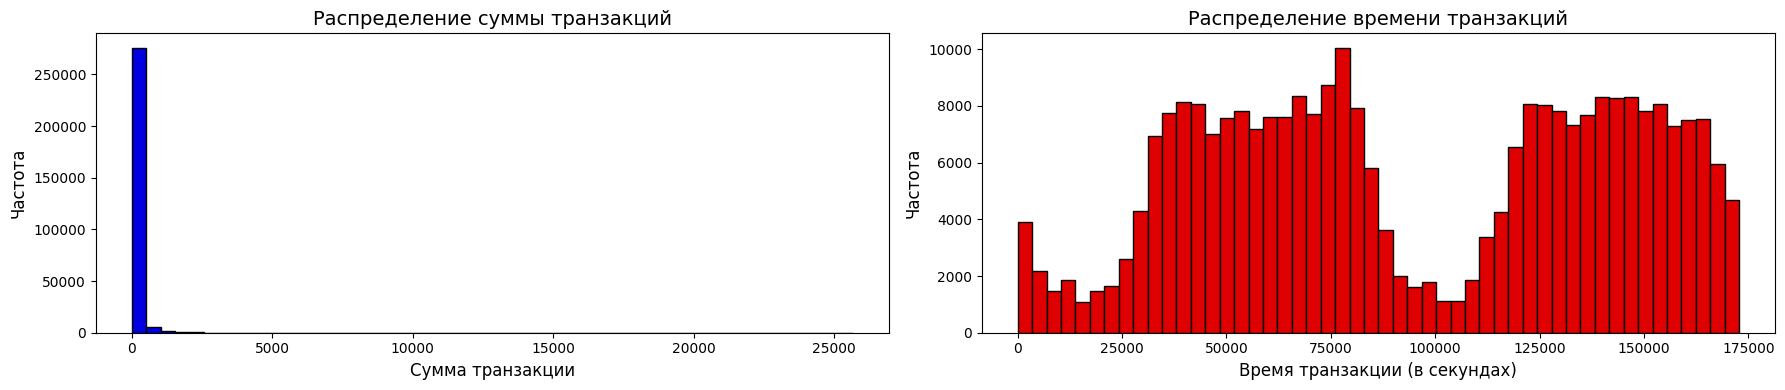

In [58]:
# Создаем две оси для двух графиков
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Данные для графиков
amount_val = df['Amount']  # Сумма транзакции
time_val = df['Time']      # Время транзакции

# Строим график распределения суммы транзакций
ax[0].hist(amount_val, bins=50, color="#0101DF", edgecolor='black')
ax[0].set_title('Распределение суммы транзакций', fontsize=14)
ax[0].set_xlabel('Сумма транзакции', fontsize=12)
ax[0].set_ylabel('Частота', fontsize=12)

# Строим график распределения времени транзакций
ax[1].hist(time_val, bins=50, color="#DF0101", edgecolor='black')
ax[1].set_title('Распределение времени транзакций', fontsize=14)
ax[1].set_xlabel('Время транзакции (в секундах)', fontsize=12)
ax[1].set_ylabel('Частота', fontsize=12)

# Отображаем графики
plt.tight_layout()  # Чтобы графики не перекрывались
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# вот последнее представление - как раз то, что нужно для RobustScaler . Преобразовываем так все нужные столбцы.

original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


In [60]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем первые 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
208792,137275.0,-0.662931,0.692257,0.073048,0.179073,1.562185,-1.252733,1.372571,-0.190418,-1.146835,...,0.304972,0.657987,-0.267126,-0.013060,0.302933,-0.544180,0.082772,0.140177,23.88,0
223366,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
206193,136104.0,-0.810846,0.998670,-0.854246,-0.143524,0.644972,-1.067849,0.239295,-0.775499,-0.030804,...,1.106518,0.811338,-0.298284,-0.066337,-0.534491,-0.219791,-0.272053,-0.287320,7.59,0
124115,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1
79536,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1


In [61]:
new_df.to_csv("/content/creditcard_rejected.csv")

In [62]:
new_df.shape

(984, 31)

Распределение классов в подвыборке


Text(0.5, 1.0, 'Распределение классов')

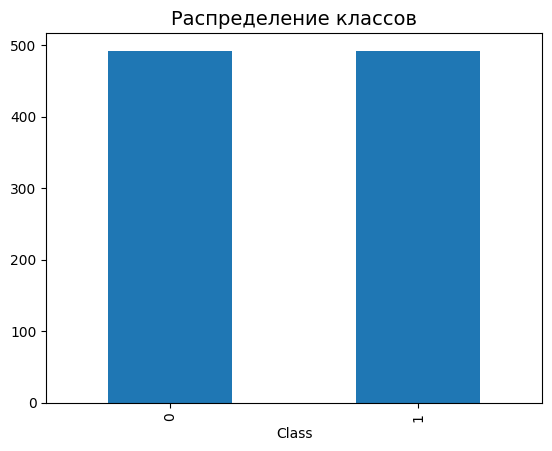

In [63]:
print('Распределение классов в подвыборке')


# проверяем снова распределение целевой переменной
new_df['Class'].value_counts().plot(kind='bar')

plt.title('Распределение классов', fontsize=14)

Text(0.5, 1.0, 'Матрица корреляций сбалансированной подвыборки')

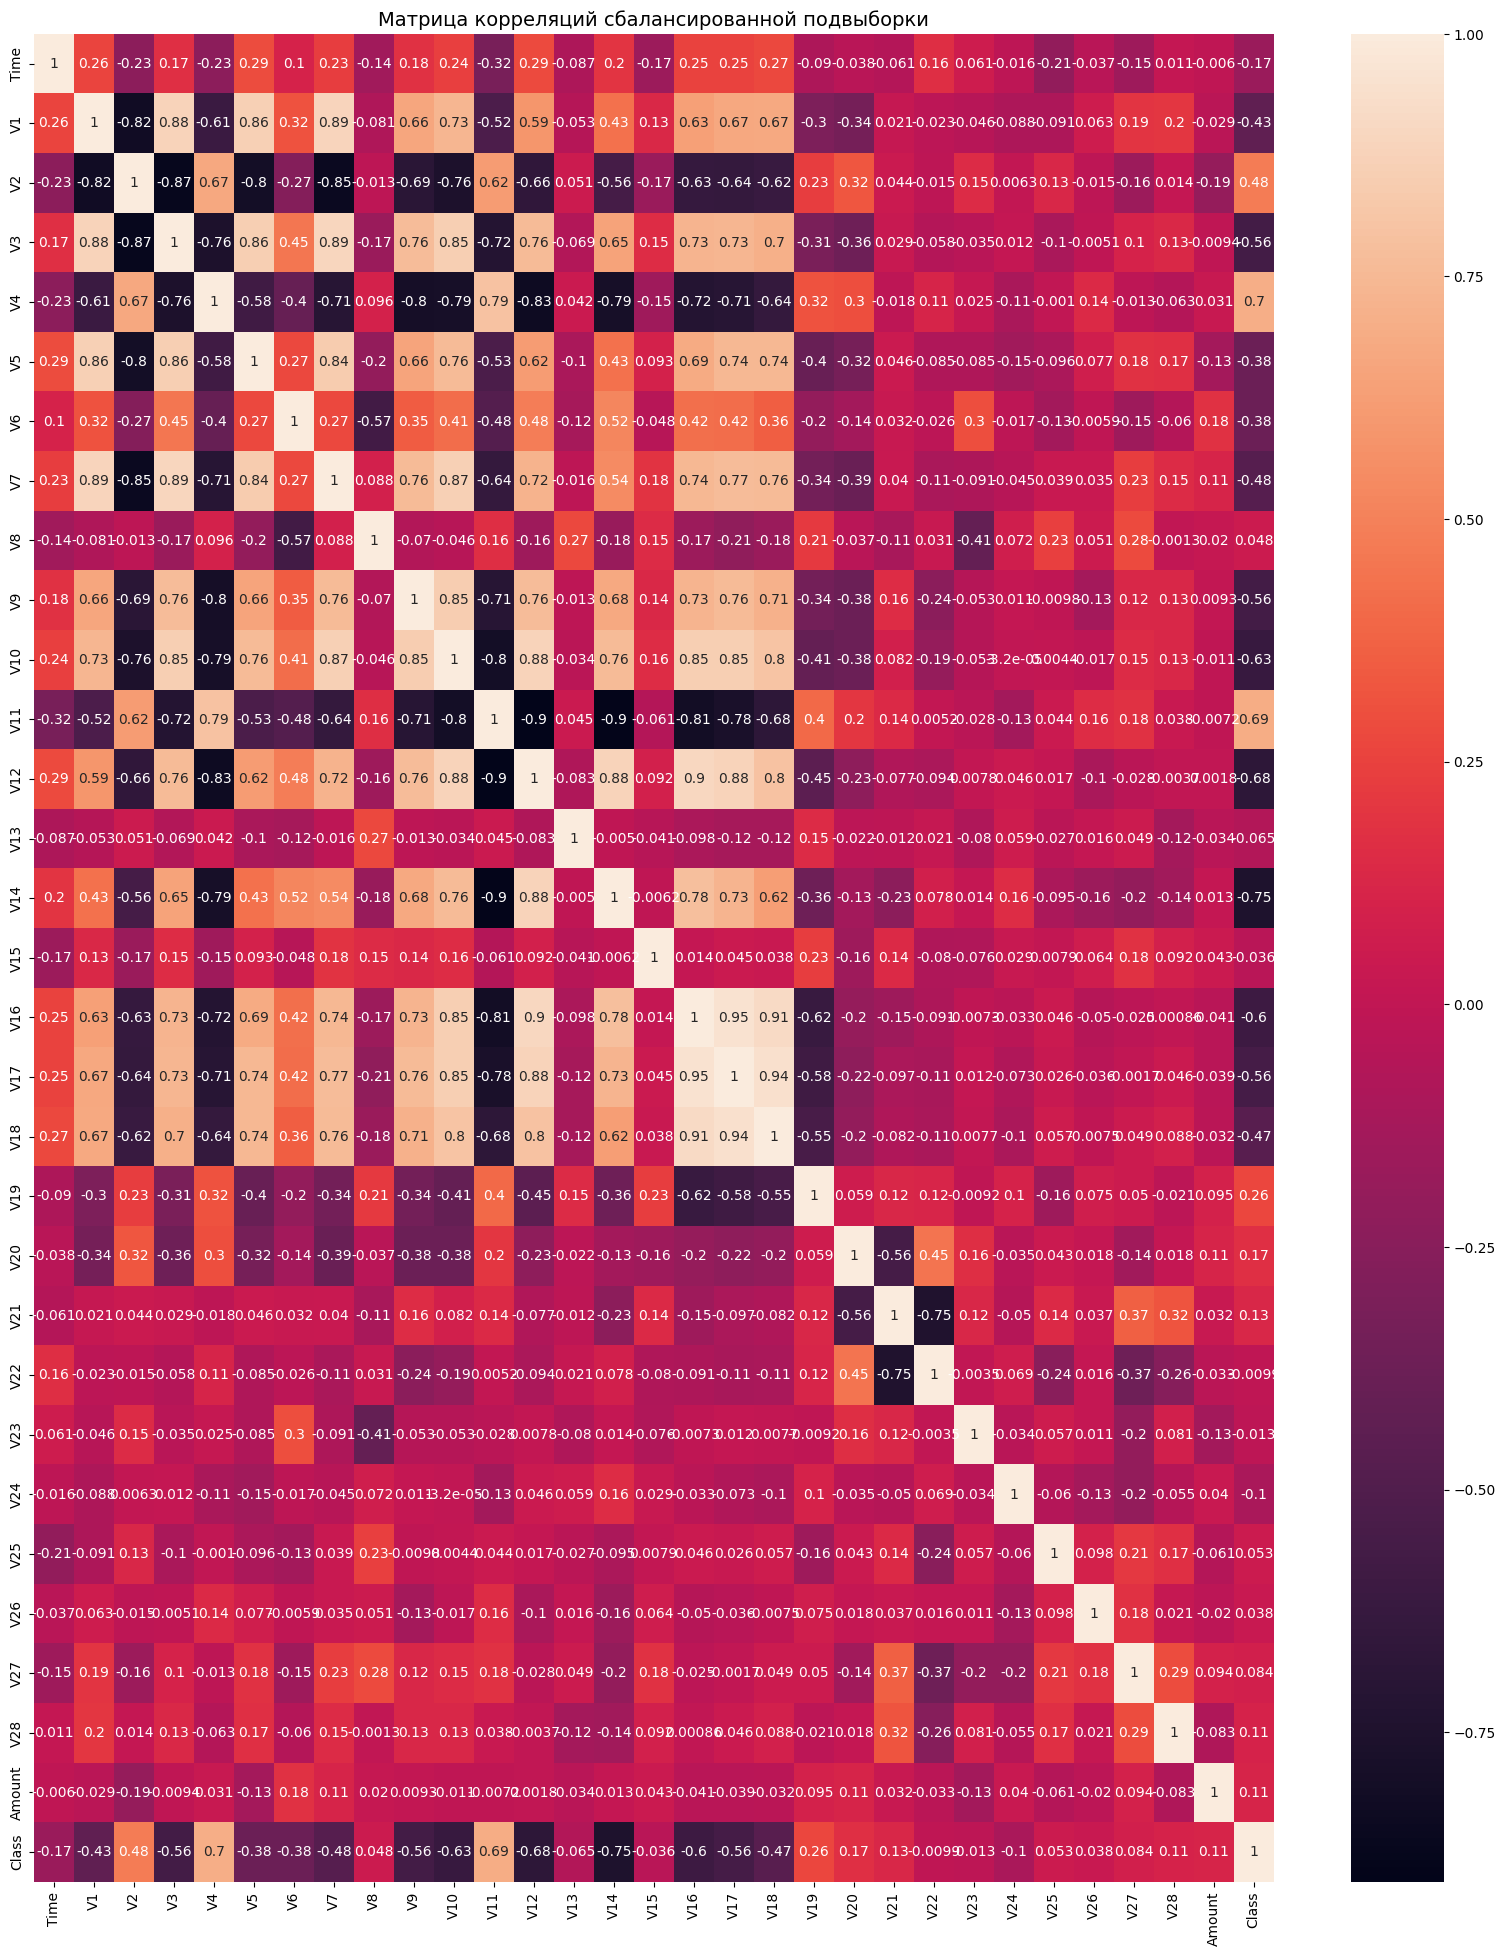

In [64]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))

# Построим матрицу корреляций
sns.heatmap(new_df.corr(numeric_only = True), annot=True)

ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

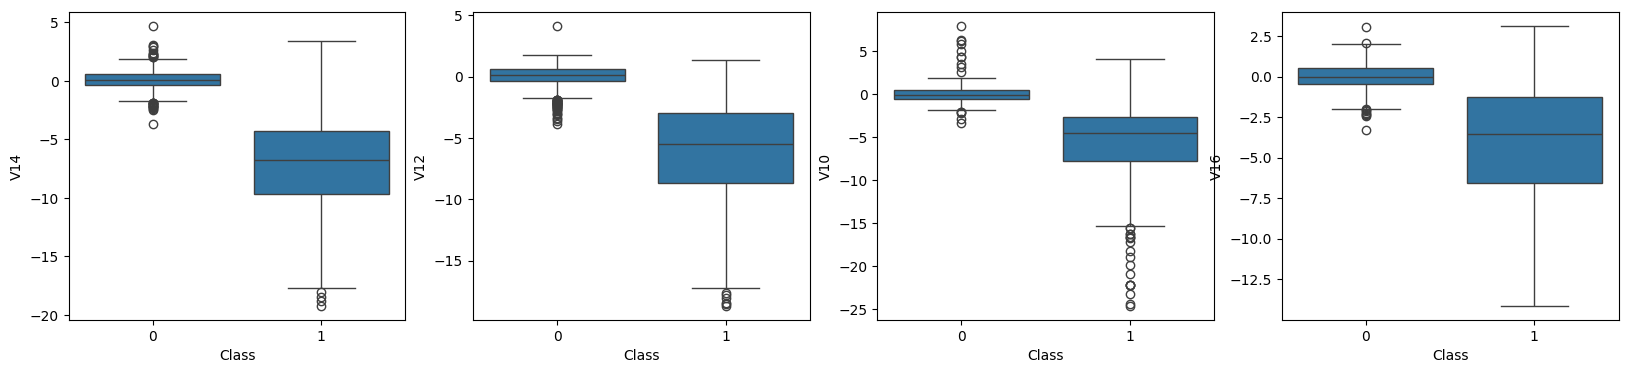

In [65]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Отрицательные корреляции
sns.boxplot(ax=axes[0], x=new_df['Class'], y=new_df['V14'])
sns.boxplot(ax=axes[1], x=new_df['Class'], y=new_df['V12'])
sns.boxplot(ax=axes[2], x=new_df['Class'], y=new_df['V10'])
sns.boxplot(ax=axes[3], x=new_df['Class'], y=new_df['V16'])

plt.show()

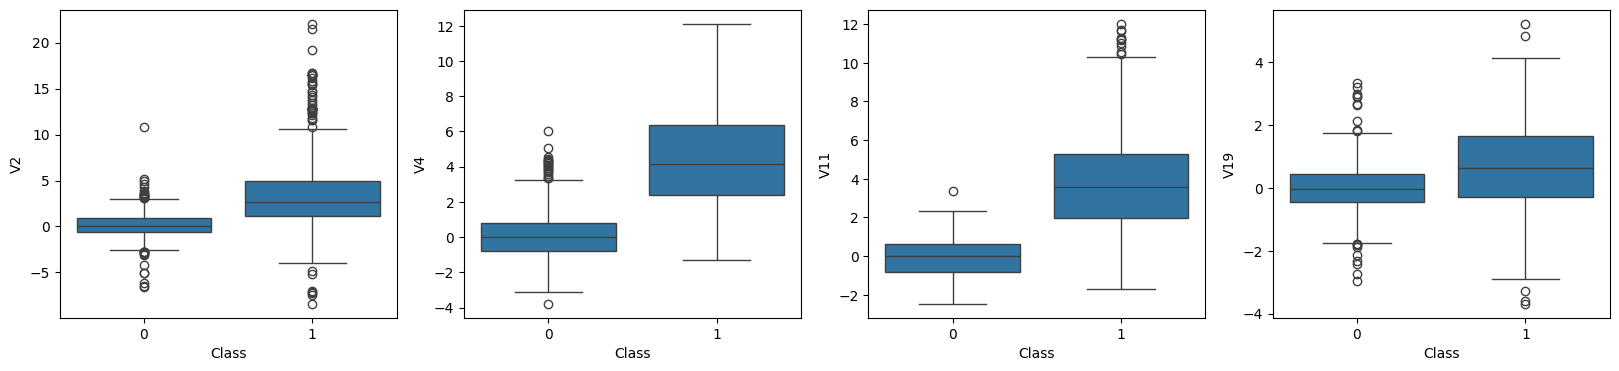

In [66]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Положительные корреляции
sns.boxplot(ax=axes[0], x=new_df['Class'], y=new_df['V2'])
sns.boxplot(ax=axes[1], x=new_df['Class'], y=new_df['V4'])
sns.boxplot(ax=axes[2], x=new_df['Class'], y=new_df['V11'])
sns.boxplot(ax=axes[3], x=new_df['Class'], y=new_df['V19'])

plt.show()

In [67]:
# Признаки с отрицательной корреляцией
neg = ["V10", "V12", "V14", "V16"]
# Признаки с положительной корреляцией
pos = ["V2", "V4", "V11", "V19"]

def plt_distplot(y, t):
    """
    Функция для построения распределений с наложением теоретического нормального распределения для списка признаков.

    :param y: Список признаков для визуализации
    :param t: Тип корреляции (1 - отрицательная, 2 - положительная)
    """
    f, axes = plt.subplots(ncols=4, figsize=(20, 6))  # 4 столбца для распределений
    s = "Негативная корреляция" if t == 1 else "Положительная корреляция"

    for i, feature in enumerate(y):
        sns.histplot(new_df[feature], ax=axes[i], kde=True, stat="density", color='skyblue', linewidth=2, label='Гистограмма')

        # Наложение нормального распределения
        mean = new_df[feature].mean()
        std = new_df[feature].std()
        xmin, xmax = axes[i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        axes[i].plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

        # Заголовок и подписи
        axes[i].set_title(f'Распределение для признака {feature}\n{str(s)}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Плотность', fontsize=10)
        axes[i].legend()

    plt.tight_layout()  # Для улучшения расположения подграфиков
    plt.show()

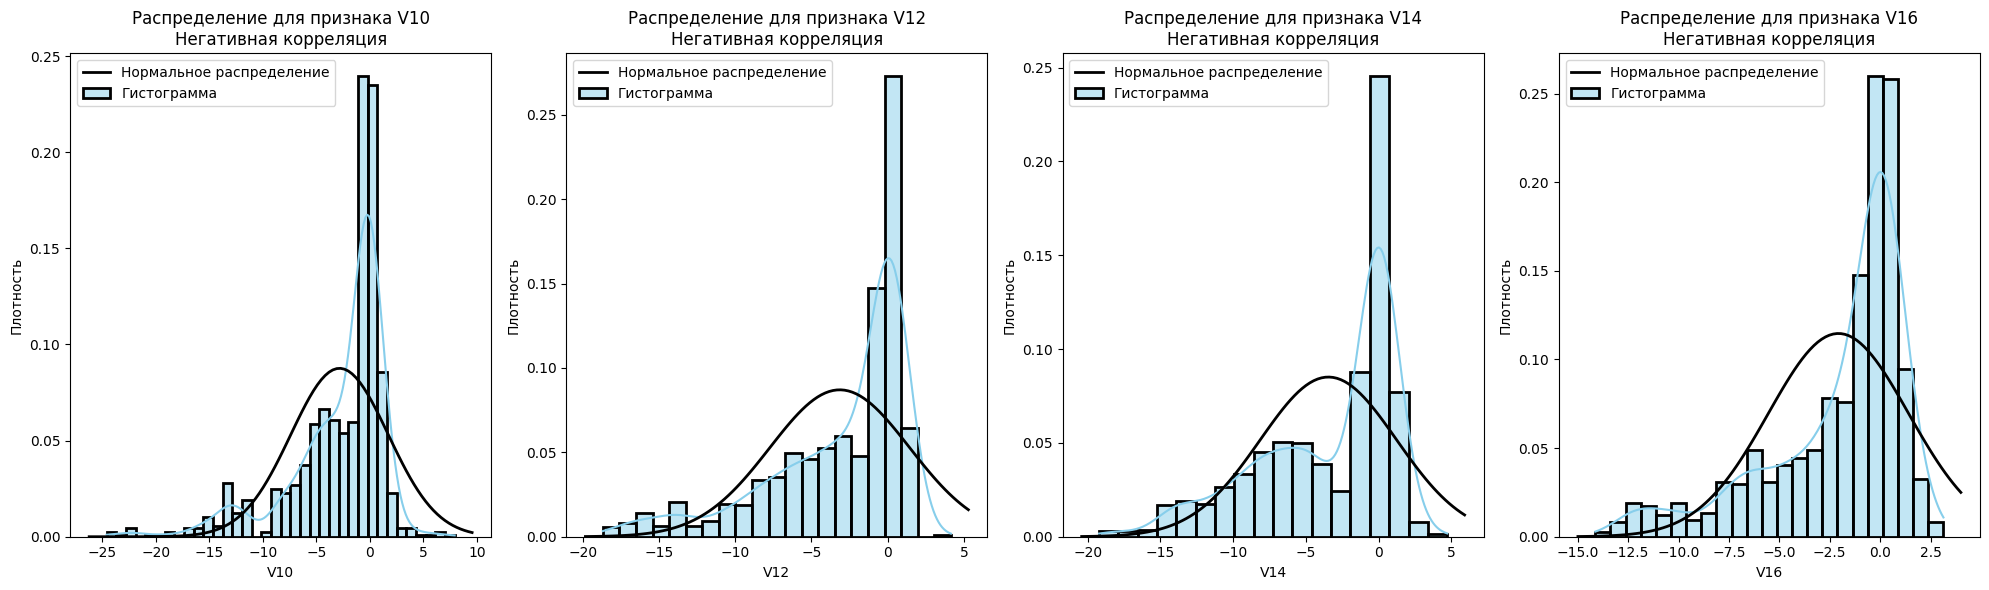

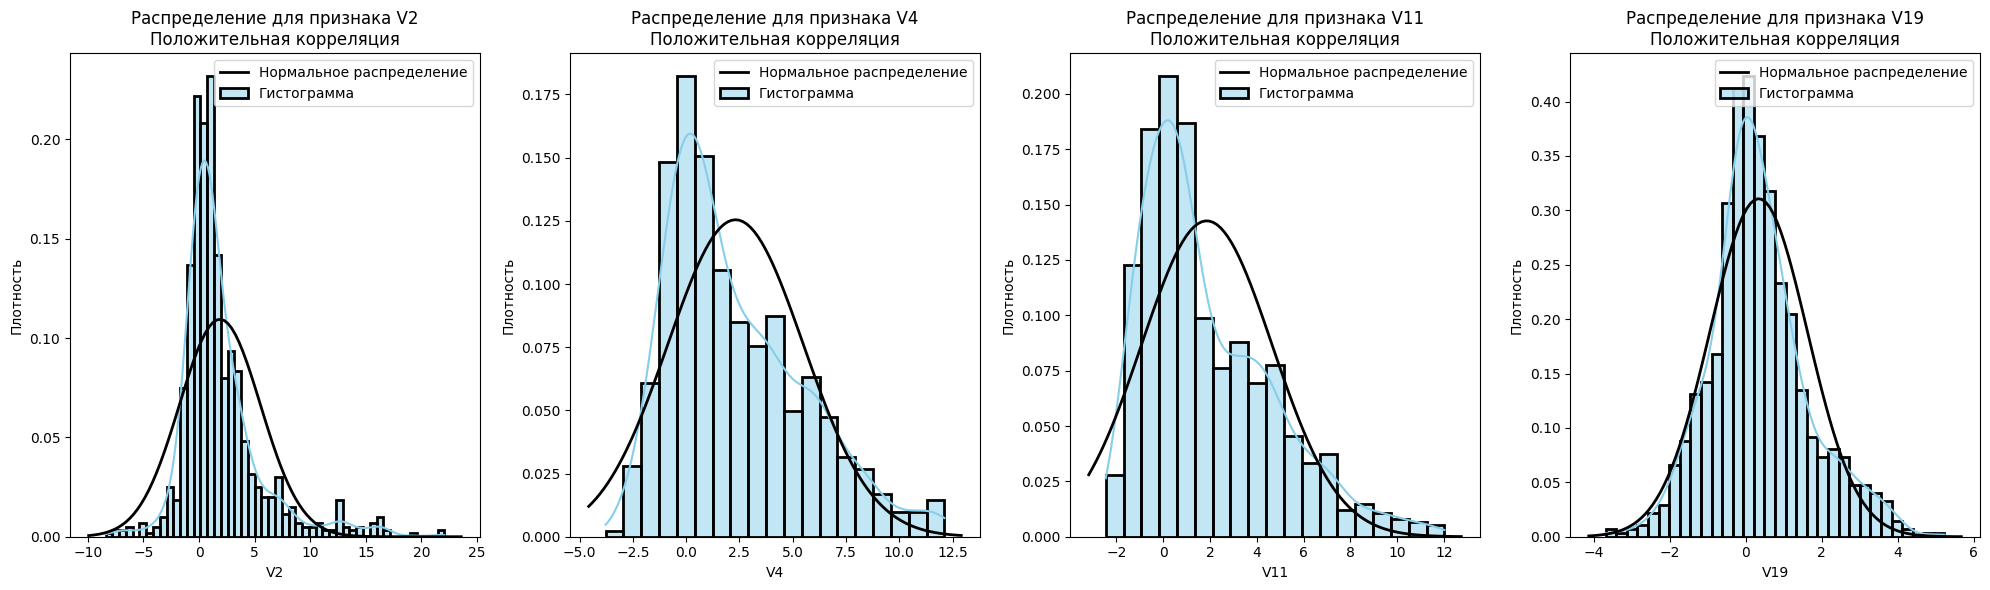

In [68]:
# Строим распределения для признаков с отрицательной корреляцией
plt_distplot(neg,1)

# Строим распределения для признаков с положительной корреляцией
plt_distplot(pos,2)

In [69]:
def del_fraud_column(column, new_df, verbose=True):
    """
    Удаляет выбросы из заданного столбца на основе межквартильного размаха (IQR) для класса 1 (мошенничество).

    :param column: Название столбца, из которого нужно удалить выбросы.
    :param new_df: Исходный DataFrame.
    :param verbose: Флаг для вывода промежуточных данных (по умолчанию True).

    :return: DataFrame без выбросов.
    """

    # Извлекаем значения признака для случаев мошенничества (Class == 1)
    v_fraud = new_df[column].loc[new_df['Class'] == 1].values

    # Рассчитываем квартильные значения и IQR
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    v_iqr = q75 - q25

    # Рассчитываем пороги выбросов
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off

    if verbose:
        print(f'Для {column}:')
        print(f'Квартиль 25: {q25} | Квартиль 75: {q75}')
        print(f'IQR: {v_iqr}')
        print(f'Порог: {v_cut_off}')
        print(f'{column} Нижняя граница: {v_lower} | Верхняя граница: {v_upper}')

    # Фильтруем DataFrame, удаляя выбросы из указанного столбца
    new_df_without_outliers = new_df[(new_df[column] >= v_lower) & (new_df[column] <= v_upper)]

    # Подсчитываем количество удаленных выбросов
    if verbose:
        removed_count = len(new_df) - len(new_df_without_outliers)
        print(f'Количество удаленных выбросов для {column}: {removed_count}')

    return new_df_without_outliers

In [70]:
# Получаем список всех числовых столбцов (кроме 'Class')
columns_to_process = [col for col in new_df.select_dtypes(include=['number']).columns if col != 'Class']

# Применяем функцию del_fraud_column ко всем числовым столбцам
for column in columns_to_process:
    new_df = del_fraud_column(column, new_df)

# Размер данных после удаления выбросов
print(f'Размер данных после удаления выбросов: {new_df.shape}')

Для Time:
Квартиль 25: 41241.5 | Квартиль 75: 128483.0
IQR: 87241.5
Порог: 130862.25
Time Нижняя граница: -89620.75 | Верхняя граница: 259345.25
Количество удаленных выбросов для Time: 0
Для V1:
Квартиль 25: -6.03606299434868 | Квартиль 75: -0.419200076257679
IQR: 5.616862918091001
Порог: 8.4252943771365
V1 Нижняя граница: -14.461357371485182 | Верхняя граница: 8.006094300878821
Количество удаленных выбросов для V1: 52
Для V2:
Квартиль 25: 1.1086191157528824 | Квартиль 75: 3.9163736295138802
IQR: 2.807754513760998
Порог: 4.211631770641497
V2 Нижняя граница: -3.1030126548886146 | Верхняя граница: 8.128005400155377
Количество удаленных выбросов для V2: 34
Для V3:
Квартиль 25: -6.559491963273132 | Квартиль 75: -1.985937229072785
IQR: 4.573554734200346
Порог: 6.86033210130052
V3 Нижняя граница: -13.419824064573652 | Верхняя граница: 4.874394872227734
Количество удаленных выбросов для V3: 20
Для V4:
Квартиль 25: 2.0697508943387923 | Квартиль 75: 5.482320110285848
IQR: 3.4125692159470553
Пор

In [76]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X.drop(['Time','Amount'], axis=1, inplace=True) # Tак как Time и Amount не коррелируют почти с таргетом


# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE().fit_transform(X)
# ВАШ КОД ЗДЕСЬ
t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
# ВАШ КОД ЗДЕСЬ
X_reduced_pca = PCA().fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
# ВАШ КОД ЗДЕСЬ
X_reduced_svd = TruncatedSVD().fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))

T-SNE заняло 6.0 сек
PCA заняло 0.0043 сек
Truncated SVD заняло 0.006 сек


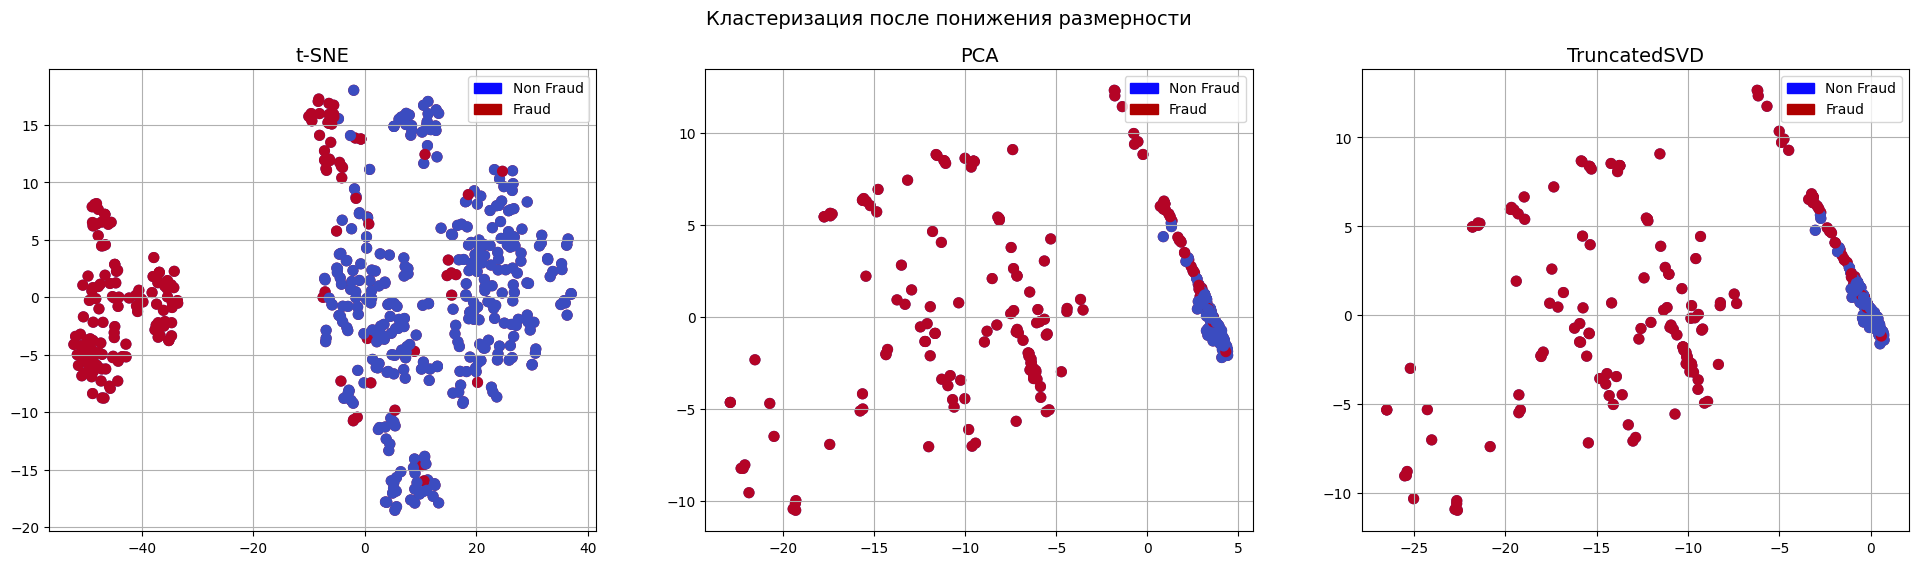

In [77]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('TruncatedSVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


plt.show()

<h3> Выводы: </h3>
<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>